In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Problem 1

<ipython-input-2-01273bcadef1>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters, signalcenters, Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

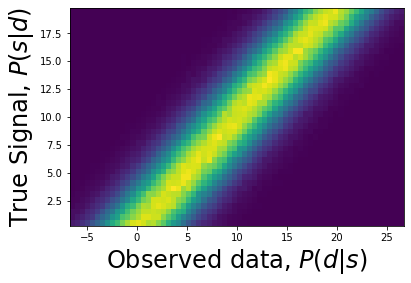

In [2]:
fig, ax = plt.subplots(1, 1)

bkgd = stats.norm.rvs(loc = 0, scale = 3, size = 1000000)
signal = stats.uniform.rvs (loc = 0, scale = 20, size = 1000000)

data = bkgd + signal
signaledges = np.linspace(0, 20, 40)
dataedges = np.linspace(-7, 27, 68)

#Psd stores an array of data to signal (i.e. an 67 long array of arrays of length 39)
#Psd[40] is a vertical slice at P(d|s) of 13 (from -7 + 40/2)
Psd, temp, temp2 = np.histogram2d(data,signal, bins = [dataedges, signaledges], density = True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T)
plt.ylabel('True Signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

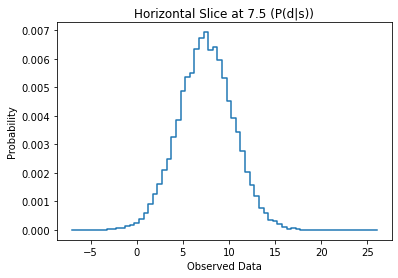

In [3]:
fig, ax = plt.subplots(1, 1)

def hor_slice(x):
    num = []
    for i in range(len(Psd)):
        num.append(Psd[i][x])
    return num

lin = np.arange(-7,26.5,.5)

ax.set_title("Horizontal Slice at 7.5 (P(d|s))")
ax.set_xlabel("Observed Data")
ax.set_ylabel("Probability")
ax.step(lin, Psd[:,15], where = 'mid')

Slice of P(d|s) at a true signal of 7.5 shown above. This gives what the observed histogram would look like if we had a signal of 7.5 along with the background. The probability is showing the probability of observing some value if the true signal we were seeing were at 7.5. We could compare this to what was actually observed when data was taken to determine if the signal was close to 7.5.

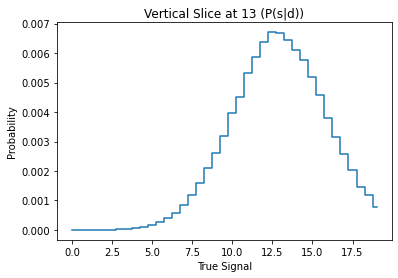

In [4]:
fig, ax = plt.subplots(1, 1)

# To convert x to an observed signal value use Obs = -7 + x/2
def ver_slice(x):
    return Psd[x]

lin = np.arange(0,19.5, .5)
ax.set_title("Vertical Slice at 13 (P(s|d))")
ax.set_xlabel("True Signal")
ax.set_ylabel("Probability")
ax.step(lin, ver_slice(40), where = 'mid')

Slice of P(s|d) at an observed signal of 13 shown above. This plot tells us what the probability of the signal being a value x on the X-axis of the above plot would be if we observed data with a mean of 13.

# Problem 2

<ipython-input-5-91010d7d9852>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters, signalcenters, Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

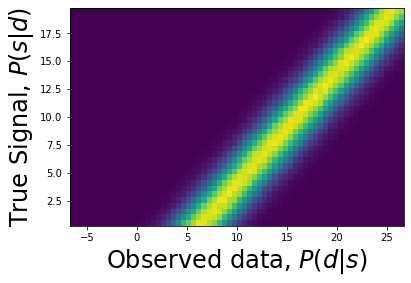

In [5]:
fig, ax = plt.subplots(1, 1)

bkgd = stats.norm.rvs(loc = 6, scale = 2, size = 1000000)
signal = stats.uniform.rvs (loc = 0, scale = 20, size = 1000000)

data = bkgd + signal
signaledges = np.linspace(0, 20, 40)
dataedges = np.linspace(-7, 27, 68)

#Psd stores an array of data to signal (i.e. an 67 long array of arrays of length 39)
#Psd[40] is a vertical slice at P(d|s) of 13 (from -7 + 40/2)
Psd, temp, temp2 = np.histogram2d(data,signal, bins = [dataedges, signaledges], density = True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T)
plt.ylabel('True Signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

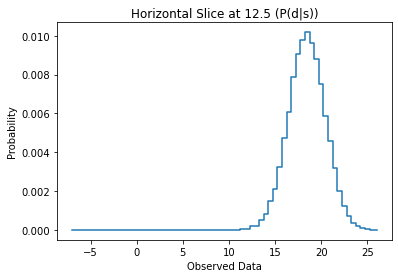

In [10]:
fig, ax = plt.subplots(1, 1)

def hor_slice(x):
    num = []
    for i in range(len(Psd)):
        num.append(Psd[i][x])
    return num

lin = np.arange(-7,26.5,.5)
ax.set_title("Horizontal Slice at 12.5 (P(d|s))")
ax.set_xlabel("Observed Data")
ax.set_ylabel("Probability")
ax.step(lin, hor_slice(25), where = 'mid')

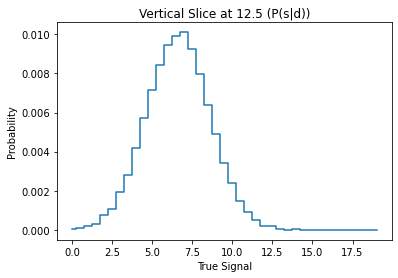

In [11]:
fig, ax = plt.subplots(1, 1)

# To convert x to an observed signal value use Obs = -7 + x/2
def ver_slice(x):
    return Psd[x]

lin = np.arange(0,19.5, .5)
ax.set_title("Vertical Slice at 12.5 (P(s|d))")
ax.set_xlabel("True Signal")
ax.set_ylabel("Probability")
ax.step(lin, ver_slice(39), where = 'mid')

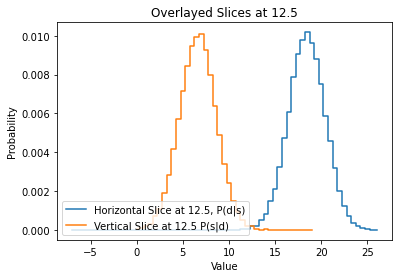

In [12]:
fig, ax = plt.subplots(1, 1)

lin = np.arange(-7,26.5,.5)
ax.step(lin, hor_slice(25), where = 'mid')
lin = np.arange(0,19.5, .5)
ax.step(lin, ver_slice(39), where = 'mid')

ax.set_title("Overlayed Slices at 12.5")
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax.legend(["Horizontal Slice at 12.5, P(d|s)", "Vertical Slice at 12.5 P(s|d)"], loc = 'lower left')

Above is an overlay of P(d|s) and P(s|d) slices both at values of 12.5. P(d|s) tells us the probability of getting specific observed data would be if the true signal was at 12.5. P(s|d) tells us what the probability of getting a certain signal is if the observed data is at 12.5. Because the background has a non-zero mean, these slices do not center on the same value. In other words, a true signal of zero would give a distribution centered on 6, so a reading of 6 would most likely indicate a signal of 0. Conversely, a true signal of 6 would give a distribution centered near 6 + 6 = 12, so a reading of *12* would most likely indicate a signal of 6.